In [1]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import CCM as cfn
# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/Data2process/Project/' 
F10t2 = '/Volumes/Dominic 10tb2/Data2process/Project/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [2]:
tr_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  'PTZ20' + '_run' + '*1_pre-CCM.npy*')
data_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*PTZ20_r*1_trace*xmap*')
data_l, tr_l

(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy'])

In [3]:
trace = np.load(tr_l[0], allow_pickle=True).item()['trace']


In [17]:
trace.shape

(7337, 9828)

In [6]:
kmeans = KMeans(n_clusters = 2, random_state=0).fit(trace)

In [5]:
from sklearn.cluster import KMeans

In [7]:
import h5py
import numpy as np
data = h5py.File(data_l[0]) 

rd_mat = np.array(data['rhodiff'])[1:,1:]

#separate non-linear input and output neurons
np.fill_diagonal(rd_mat, 'nan') #set diagonals to nan
rd_out_v = np.nanmean(rd_mat, axis=1)
rd_in_v = np.nanmean(rd_mat, axis=0)

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
out_pos = rd_out_v[(rd_out_v > 0) & (rd_in_v > 0)]
in_pos = rd_in_v[(rd_out_v > 0) & (rd_in_v > 0)]

In [11]:
sub_lab = kmeans.labels_[(rd_out_v > 0) & (rd_in_v > 0)]
sub_lab.shape, out_pos.shape, in_pos.shape

((6739,), (6739,), (6739,))

In [98]:
sub_trace = trace[(rd_out_v > 0) & (rd_in_v > 0)]

In [44]:
np.max((out_pos/in_pos)[sub_lab == 0])

7754.5566

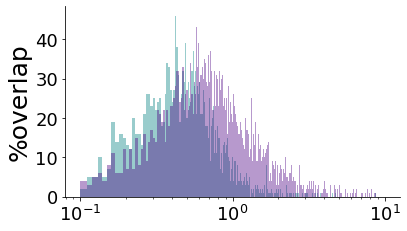

In [54]:
fig, ax = plt.subplots(figsize = (6,3.5))

#LARGE VALUES MEAN MORE OUT THAN IN
plt.hist((out_pos/in_pos)[sub_lab == 0], bins = 1000, range = (0.1, 10), color = 'teal', alpha = 0.4)
plt.hist((out_pos/in_pos)[sub_lab == 1], bins = 1000, range = (0.1, 10), color = 'indigo', alpha = 0.4)

plt.yticks(size = 18)
plt.xticks(size = 18)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('%overlap', size = '25')
ax.set_xscale('log')
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)

#plt.ylim(top = 2000, bottom = 0)

plt.savefig(Ffig + 'CCM_in_out_hist.svg', transparent = True)
plt.show()

In [42]:
10**-1

0.1

In [56]:
d1 = (out_pos/in_pos)[sub_lab == 0]
d2 = (out_pos/in_pos)[sub_lab == 1]

In [65]:
len(d1), len(d2)

(2194, 4545)

In [57]:
#are in and out and nonlinear the same populations?

point = np.zeros((2194 + 4545))

df = {}
count=0
choose = 0

data = d1, d2

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('Cluster 1',2194),
                                                                 adfn.repeat_list('Cluster 2', 4545),)})
                  
                  
                  

In [ ]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['k','coral','firebrick']

fig, ax = plt.subplots(figsize = (3,4))
ax = sns.pointplot(x="Labels", y="data", data = df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=df, hue = 'Labels', palette = colors2, size = 17, jitter = True ,alpha = 0.7)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('%overlap', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.ylim(top = 2000, bottom = 0)

plt.savefig(Ffig + 'CCM_in_out_comp.svg', transparent = True)
plt.show()

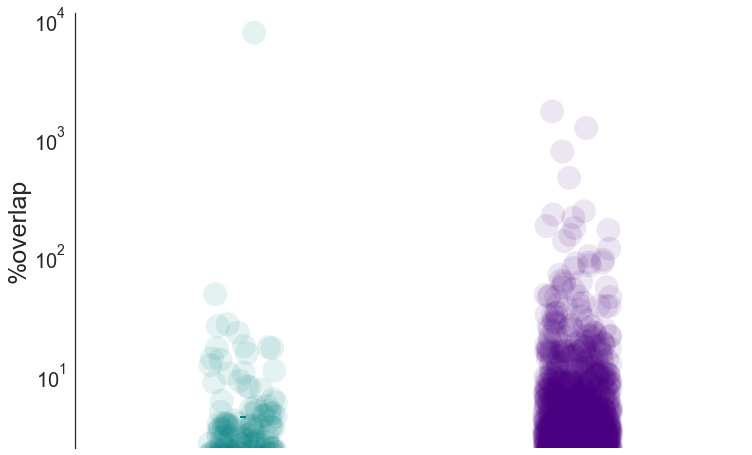

In [73]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['teal', 'indigo']

fig, ax = plt.subplots(figsize = (12,8))
ax = sns.pointplot(x="Labels", y="data", data = df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=df, hue = 'Labels', palette = colors2, size = 24, jitter = True ,alpha = 0.1)

plt.yticks(size = 20)
#plt.ylim(top = 000)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('%overlap', size = '25')
ax.get_xaxis().set_visible(False)
ax.set_yscale('log')

#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.ylim(top = 2000, bottom = 0)

#plt.savefig(Ffig + 'avsize_exp_ptz.svg', transparent = True)
plt.savefig(Ffig + 'CCM_in_out_cluster_comp.png', transparent = True)

plt.show()

In [62]:
from scipy import stats
data = d1
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)


4.4321933 3.534245151939332


In [63]:
from scipy import stats
data = d2
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)


3.6329882 0.5178481239931352


In [60]:
#Compare bln vs
d1 = (out_pos/in_pos)[sub_lab == 0]
d2 = (out_pos/in_pos)[sub_lab == 1]

adfn.stats_2samp(d1, d2, 0.05, 1, 'ind')



At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
U = 2724352.0   p = 6.746818564096242e-201


(2724352.0, 6.746818564096242e-201)

In [74]:
trace.shape

(7337, 9828)

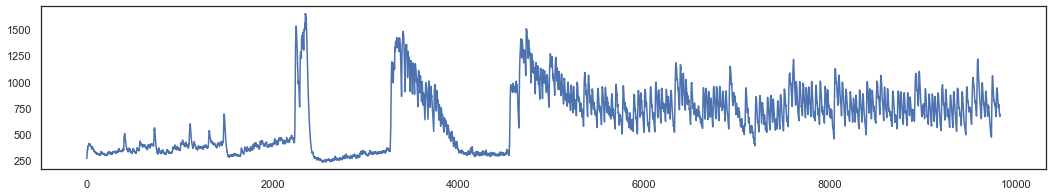

In [75]:
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, trace)
plt.plot(mean)

In [85]:
from sklearn import decomposition

n_components = 7

nmf = decomposition.NMF(n_components)
fit = nmf.fit(trace - np.min(trace))

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


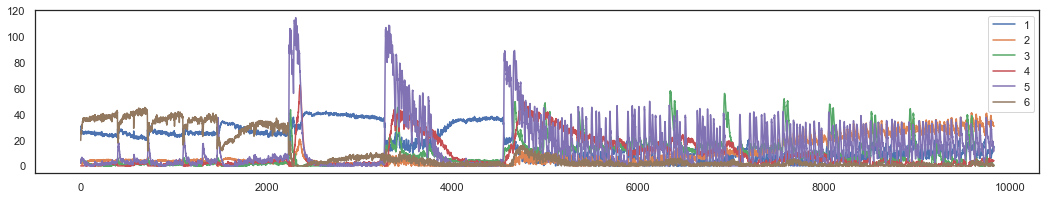

In [88]:
fig, ax = plt.subplots(figsize= (18,3))

for i in range(n_components-1):

    plt.plot(fit.components_[i+1], label = str(i + 1))
    plt.legend()

plt.show()

In [100]:
diff = (out_pos/in_pos)
diff.shape

(6739,)

In [109]:
diff_out = sub_trace[np.where(diff > 1)[0]]
diff_in = sub_trace[np.where(diff < 1)[0]]
diff_out.shape, diff_in.shape

((2848, 9828), (3891, 9828))

In [106]:
sub_trace[np.where(diff > 1)[0]].shape

(2848, 9828)

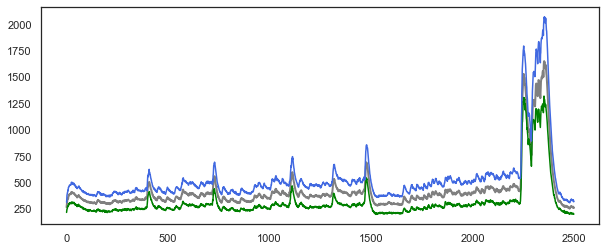

In [122]:
fig, ax = plt.subplots(figsize= (10,4))
mean = np.apply_along_axis(np.mean, 0, trace)
plt.plot(mean[:2500], c = 'grey', linewidth = 2)

mean_out = np.apply_along_axis(np.mean, 0, diff_out)
plt.plot(mean_out[:2500], c = 'green')

mean_in = np.apply_along_axis(np.mean, 0, diff_in)
plt.plot(mean_in[:2500], c = 'royalblue')
plt.savefig(Ffig + 'CCM_in_out_mean.svg', transparent = True)

plt.show()

In [93]:
np.where(diff < 1)[0]

array([   1,    2,    4, ..., 6734, 6736, 6738])

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


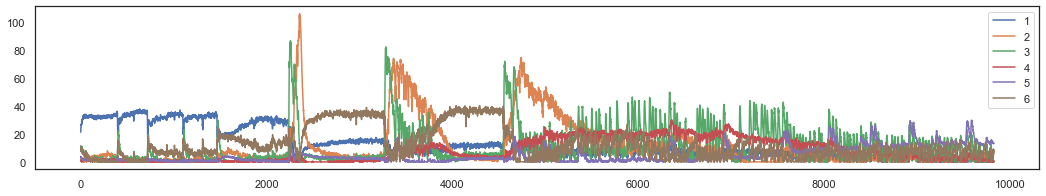

In [96]:
from sklearn import decomposition

n_components = 7
inp = t1
nmf = decomposition.NMF(n_components)
fit = nmf.fit(inp - np.min(inp))


fig, ax = plt.subplots(figsize= (18,3))

for i in range(n_components-1):

    plt.plot(fit.components_[i+1], label = str(i + 1))
    plt.legend()

plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


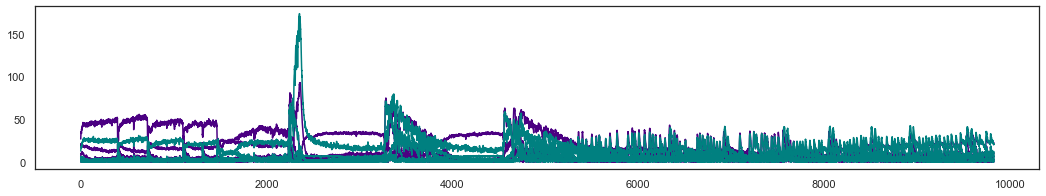

In [131]:
from sklearn import decomposition

n_components = 7
inp = diff_in
nmf = decomposition.NMF(n_components)
fit = nmf.fit(inp - np.min(inp))


fig, ax = plt.subplots(figsize= (18,3))

for i in range(n_components-1):

    plt.plot(fit.components_[i+1], c = 'indigo')

inp = diff_out
nmf = decomposition.NMF(n_components)
fit = nmf.fit(inp - np.min(inp))
    
for i in range(n_components-1):

    plt.plot(fit.components_[i+1], c = 'teal')

plt.show()


In [ ]:
fig, ax = plt.subplots(figsize= (10,4))
mean = np.apply_along_axis(np.mean, 0, trace)
plt.plot(mean[:2500], c = 'grey', linewidth = 2)

mean_out = np.apply_along_axis(np.mean, 0, diff_out)
plt.plot(mean_out[:2500], c = 'green')

mean_in = np.apply_along_axis(np.mean, 0, diff_in)
plt.plot(mean_in[:2500], c = 'royalblue')
plt.savefig(Ffig + 'CCM_in_out_mean.svg', transparent = True)

plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


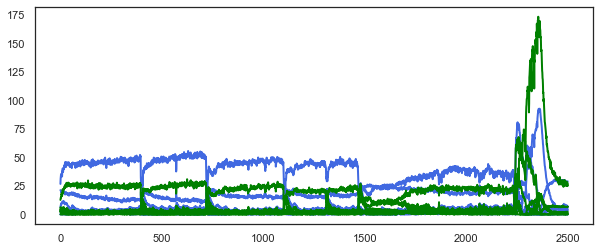

In [134]:
from sklearn import decomposition

n_components = 7
inp = diff_in
nmf = decomposition.NMF(n_components)
fit = nmf.fit(inp - np.min(inp))


fig, ax = plt.subplots(figsize= (10,4))

for i in range(n_components-1):

    plt.plot(fit.components_[i+1][:2500], c = 'royalblue', linewidth = 2)

inp = diff_out
nmf = decomposition.NMF(n_components)
fit = nmf.fit(inp - np.min(inp))
    
for i in range(n_components-1):

    plt.plot(fit.components_[i+1][:2500], c = 'green', linewidth = 2)
plt.savefig(Ffig + 'CCM_NNMF_mean.svg', transparent = True)

plt.show()
